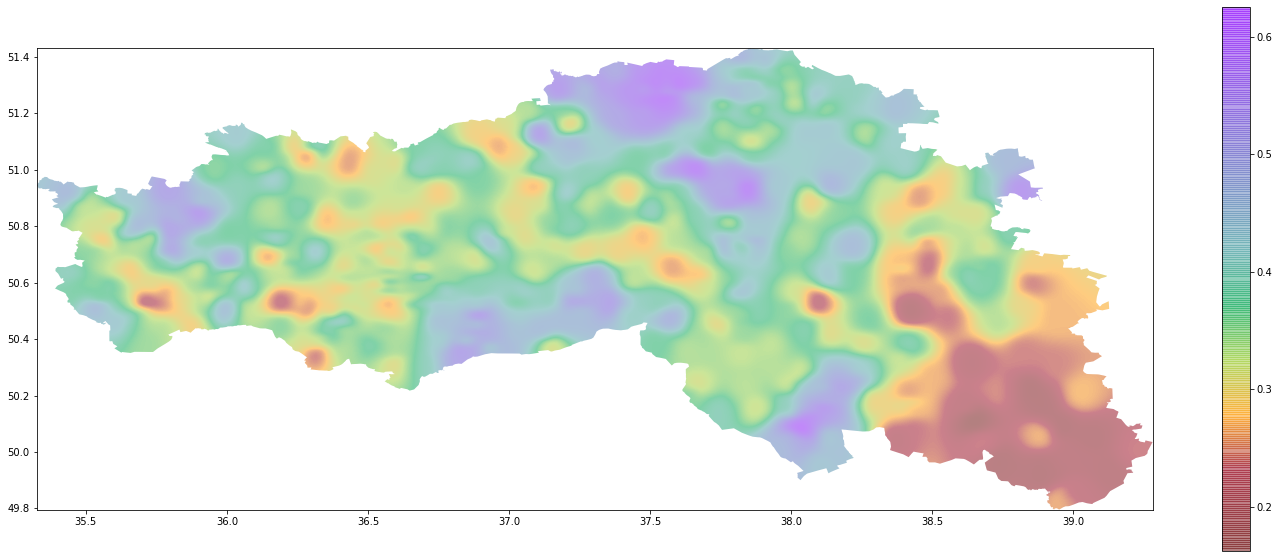

In [183]:
from pyproj import transform
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon,Circle
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



def IDW(X,Y):
    #Степень "затухания"
    pwr=4
    #вектор-коэффициент обратнопропорциональный расстояниям между расчетной точкой и точками с данными
    distance=1/np.apply_along_axis(lambda x:((X-x[1])**2+(Y-x[0])**2)**0.5,1,data)**pwr
    return((data[:,2]*distance.T).sum(axis=2).T)/distance.sum(axis=0)


ds=pd.read_excel('./hm.xlsx',sheet_name='hm')
#ds=gpd.GeoDataFrame(ds,geometry=gpd.points_from_xy(ds['Lon'], ds['Lat'], crs='EPSG:4326')).to_crs('EPSG:3857')
#ds['Lon'], ds['Lat']=transform('epsg:4326','epsg:3857',ds['Lon'].tolist(),ds['Lat'].tolist())
data=np.asarray(ds)

reg=gpd.read_file('./bel.json')#.to_crs('EPSG:3857').plot()

x,y=np.meshgrid(
    np.linspace(reg.geometry.bounds.minx[0],reg.geometry.bounds.maxx[0], 100),
    np.linspace(reg.geometry.bounds.miny[0],reg.geometry.bounds.maxy[0], 100)
    #np.linspace(35,37,5),
    #np.linspace(49,51,5)
)

Z=IDW(x,y)

fig, ax = plt.subplots(figsize=(25,10))
patch=Polygon(gpd.read_file('./bel.json').geometry[0].exterior.coords,transform=ax.transData)
cmap = LinearSegmentedColormap.from_list(
    'mycmap',
    [
        (0.0, '#660000'),
        (0.15, '#960018'),
        (0.25, '#ff9900'),
        (0.35, '#9acd32'),
        (0.45, '#00a550'),
        (0.55, '#48a1a1'),
        (1.0, '#8b00ff')
    ]
)

im=plt.imshow(
    Z,
    cmap=cmap,
    alpha=0.5,
    extent=(
        reg.geometry.bounds.minx[0],
        reg.geometry.bounds.maxx[0],
        reg.geometry.bounds.miny[0],
        reg.geometry.bounds.maxy[0]
        #35,37,49,51
    ),
    origin='lower',
    interpolation='bicubic',
    clip_path=patch, clip_on=True
)
plt.colorbar()
plt.show()
